In [19]:
#download the model weights from google drive
import gdown
url = "https://docs.google.com/uc?id=1zg8vwXOSnbBUKsEYv_SbQr0Ym7P_tlEm"
output = "models/nuclei_test.hdf5"
gdown.download(url=url, output=output)

Downloading...
From: https://docs.google.com/uc?id=1zg8vwXOSnbBUKsEYv_SbQr0Ym7P_tlEm
To: /home/karthika/Desktop/sudh/segmentation_nuclei/onward_assignment/problem2/models/nuclei_test.hdf5
100%|██████████| 373M/373M [03:27<00:00, 1.80MB/s] 


'models/nuclei_test.hdf5'

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
#all segmentation models are in this package
from unet_models import simple_unet_model
import random
import numpy as np

In [4]:
image_directory = 'data/task_2/images/'
mask_directory = 'data/task_2/masks/'

In [5]:
SIZE = 256
image_list = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_list = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

images = os.listdir(image_directory)
for image_name in images:
    if (image_name.split('.')[1] == 'png'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_list.append(np.array(image))

masks = os.listdir(mask_directory)
for image_name in masks:
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_list.append(np.array(image))
        
        
#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_list), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_list)),3) / 255.

IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

In [6]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

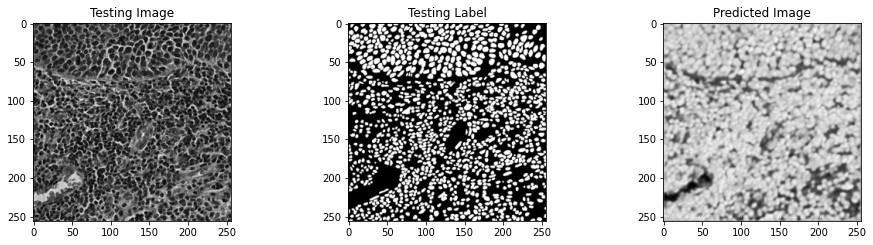

In [8]:
#Predict on a few images
model = get_model()
model.load_weights('models/nuclei_test.hdf5') #Trained for 50 epochs and then additional 100

test_img_number = random.randint(0, len(image_dataset)-1)
test_img = image_dataset[test_img_number]
ground_truth=mask_dataset[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
prediction = model.predict(test_img_input)
predicted_seg = (prediction[0,:,:,0]*255).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Predicted Image')
plt.imshow(predicted_seg, cmap='gray')